In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.colors import LinearSegmentedColormap

In [10]:
colors = ["red", "yellow", "green"]
cmap = LinearSegmentedColormap.from_list("score_cmap", colors, N=256)

In [11]:
import ast
import re
def parse_score(score_str):
    match = re.search(r"recall=(\d+\.\d+)", score_str)
    if match:
        return float(match.group(1))
    else:
        return pd.NA

def evaluate_question_recall(output_file, title):
    df = pd.read_csv(output_file, index_col=0)
    df['recall'] = df['new_score'].apply(parse_score)
    average_score = df['recall'].mean()
    pivot_table = df.pivot(index="depth_percent", columns="context_length", values="recall")
   
    fig, ax = plt.subplots(figsize=(10, 8))
    cax = ax.pcolor(pivot_table, edgecolors='k', linewidths=1, cmap=cmap, vmin=0, vmax=1)
    fig.colorbar(cax)

    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_label_position('bottom')

    ax.set_xticks(range(len(pivot_table.columns)))
    ax.set_xticklabels(pivot_table.columns)
    ax.set_yticks(range(len(pivot_table.index)))
    ax.set_yticklabels(pivot_table.index)

    ax.set_xlabel('Context Length')
    ax.set_ylabel('Depth Percent')

    ax.invert_yaxis()
    ax.set_title(f'{title}\naverage score:{average_score}')

    plt.xticks(rotation=45)
    plt.show()

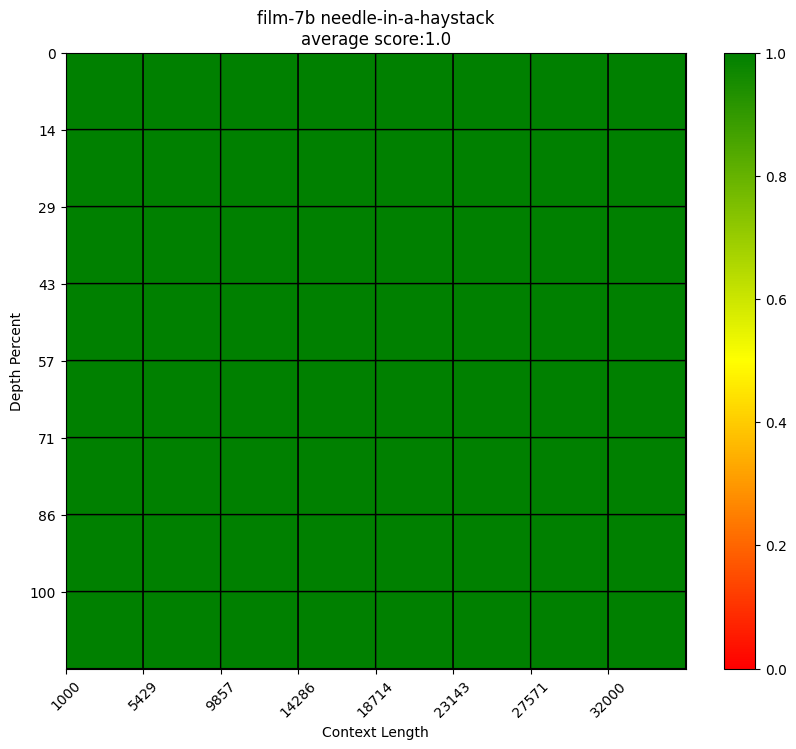

In [12]:
# set your model
model = "" # TODO : set model name
home_dir = "" # TODO : set project path
output_dir = os.path.join(home_dir, "needle-in-the-haystack-test", "output", model)

min_len, max_len = 1000, 32000 # (Optional)
depth_n = 8 # (Optional)
len_n = 8 # (Optional)

sf = "SFquestion_default"
output_file = os.path.join(output_dir, sf, f"{min_len}_{max_len}_{len_n}_{depth_n}", "rouge_results.csv")
title = f"{model} needle-in-a-haystack"
evaluate_question_recall(output_file, title)